In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/dhrim/cau_2022_summer/master/material/deep_learning/car_regression.csv

--2022-07-22 03:34:54--  https://raw.githubusercontent.com/dhrim/cau_2022_summer/master/material/deep_learning/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.01s   

2022-07-22 03:34:54 (4.25 MB/s) - ‘car_regression.csv’ saved [58697/58697]



회귀 :기존의 데이터를 통해 구축해 놓은 것을 바탕으로 새로운 아파트의 가격을 예측

In [5]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]
print(train_x[:5])
print(train_y[:5])


[[-0.86291079 -1.04556387 -0.89551439 -1.16268096  0.52872248  0.00554007
   0.          0.          1.        ]
 [-0.86291079 -0.85443969 -0.79159443 -1.17445394 -0.08747315  1.63432105
   0.          1.          0.        ]
 [ 1.48205303  1.18103289  1.18288491  0.91525015 -0.55868157  0.00554007
   1.          0.          0.        ]
 [ 0.30957112  0.53121066 -0.84355441  0.21240319  1.43489251 -0.26592342
   1.          0.          0.        ]
 [-0.86291079 -0.70154034  0.27358521 -0.21495601  0.05751406  0.54846706
   0.          1.          0.        ]]
[[ 1.09597353]
 [ 1.60846503]
 [-1.3383611 ]
 [-1.08211534]
 [-0.23650437]]


In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 85ms/step - loss: 1.3782 - mape: 162.8472 - val_loss: 1.0875 - val_mape: 144.0565
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 1.1772 - mape: 159.8899 - val_loss: 0.9565 - val_mape: 136.3135
Epoch 3/1000
3/3 [==============================

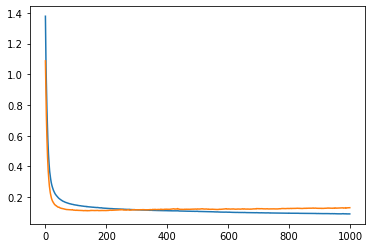

3/3 [==============================] - 0s 5ms/step - loss: 0.1301 - mape: 161.9844
loss= 0.13005197048187256
mape= 161.98439025878906


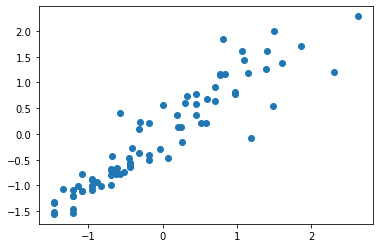

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

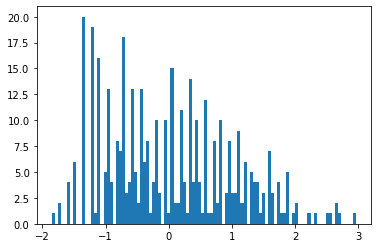

In [8]:
import matplotlib.pyplot as plt

plt.hist(y.flatten(), bins=100)
plt.show()